In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow import keras
# from keras.layers import Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, Dense, Flatten, LeakyReLU, Reshape, BatchNormalization
# from keras.models import Sequential
from keras.optimizers import Adam
import keras
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [ ]:
files = glob.glob('/content/*.jpeg')

In [ ]:
def load_images_from_folder(folder, img_size=(256, 256)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
    return np.array(images)

images = load_images_from_folder('/content/')


In [ ]:
# @title
# def display_images(images, title="Sample Images", n=5):
#     plt.figure(figsize=(10, 5))
#     for i in range(n * n):
#         plt.subplot(n, n, i + 1)
#         plt.imshow(images[i], cmap='gray')
#         plt.axis('off')
#     plt.suptitle(title, fontsize=20)
#     plt.show()

# def plot_pixel_intensity(images, title="Pixel Intensity Distribution"):
#     pixel_values = images.ravel()
#     plt.figure(figsize=(2, 5))
#     sns.histplot(pixel_values, bins=50, kde=True)
#     plt.title(title)
#     plt.xlabel("Pixel Intensity")
#     plt.ylabel("Frequency")
#     plt.show()

# display_images(images, title="Sample X-ray Images", n=4)

# def plot_pixel_intensity(images, title="Pixel Intensity Distribution"):
#     pixel_values = images.ravel()
#     plt.figure(figsize=(10, 5))
#     sns.histplot(pixel_values, bins=50, kde=True)
#     plt.title(title)
#     plt.xlabel("Pixel Intensity")
#     plt.ylabel("Frequency")
#     plt.show()

# # Plot pixel intensity histograms for X-ray and MRI images
# plot_pixel_intensity(images, title="X-ray Pixel Intensity Distribution")

# def edge_detection(images, title="Edge Detection"):
#     edges = [cv2.Canny(img, 100, 200) for img in images[:10]]
#     plt.figure(figsize=(10, 5))
#     for i, edge_img in enumerate(edges):
#         plt.subplot(2, 5, i + 1)
#         plt.imshow(edge_img, cmap='gray')
#         plt.axis('off')
#     plt.suptitle(title, fontsize=20)
#     plt.show()

# # Display edge detection results for X-rays and MRIs
# edge_detection(images, title="Edge Detection on Sample X-Ray Images")

In [ ]:
mri_data = images[:]

len(mri_data)

1341

In [ ]:
mri_data = np.array(mri_data).reshape((1341, 256, 256, 1))
mri_data = (mri_data - 127.5) / 127.5

In [ ]:
buffer_size = mri_data.shape[0]
batch_size = 16


In [ ]:
# Batch and shuffle the data
train_x = tf.data.Dataset.from_tensor_slices(mri_data).shuffle(buffer_size).batch(batch_size)

# **GENERATING IMAGES**

In [ ]:
generator = keras.models.load_model('/content/drive/MyDrive/xray_generator.keras')
discriminator = keras.models.load_model('/content/drive/MyDrive/xray_discriminator.keras')

In [ ]:
lr = 3e-5

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# @title
# def build_generator():
#   model = Sequential([
#       Dense(8*8*256, input_shape=(500, ), use_bias=False),
#       BatchNormalization(),
#       LeakyReLU(alpha=0.2),
#       Dropout(0.25),
#       Reshape((8, 8, 256)),
#       Conv2DTranspose(512, kernel_size=8, strides=1, padding='same', use_bias=False),
#       BatchNormalization(),
#       LeakyReLU(alpha=0.2),
#       Conv2DTranspose(256, kernel_size=8, strides=2, padding='same', use_bias=False),
#       BatchNormalization(),
#       LeakyReLU(alpha=0.2),
#       Conv2DTranspose(128, kernel_size=8, strides=2, padding='same', use_bias=False),
#       BatchNormalization(),
#       LeakyReLU(alpha=0.2),
#       Conv2DTranspose(64, kernel_size=8, strides=2, padding='same', use_bias=False),
#       BatchNormalization(),
#       LeakyReLU(alpha=0.2),
#       Conv2DTranspose(32, kernel_size=8, strides=2, padding='same', use_bias=False),
#       BatchNormalization(),
#       LeakyReLU(alpha=0.2),
#       Conv2DTranspose(1, kernel_size=8, strides=2, activation='tanh', padding='same', use_bias=False)
#   ])
#   return model

# def build_discriminator():
#   model = Sequential([
#     Conv2D(64, kernel_size=6, strides=1, input_shape=(256, 256, 1), padding='same'),
#     LeakyReLU(alpha=0.2),
#     MaxPooling2D(pool_size=1),
#     Dropout(0.3),
#     Conv2D(128, kernel_size=6, strides=2, padding='same'),
#     LeakyReLU(alpha=0.2),
#     MaxPooling2D(pool_size=1),
#     Dropout(0.3),
#     Conv2D(256, kernel_size=6, strides=2, padding='same'),
#     LeakyReLU(alpha=0.2),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Conv2D(512, kernel_size=6, strides=1, padding='same'),
#     LeakyReLU(alpha=0.2),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
#     Flatten(),
#     Dense(1, activation='sigmoid')
#   ])
#   return model

# generator = build_generator()
# discriminator = build_discriminator()

# generator.summary()
# discriminator.summary()



In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(3*lr, beta_1=0.5)

In [ ]:
import matplotlib.pyplot as plt

def save_img(epoch):
  noise = np.random.normal(0, 1, (5, 500))
  gen_imgs = generator(noise, training=False)
  print("Figure: ", epoch)
  plt.figure()
  _, a = plt.subplots(1, 5)

  for i in range(5):
    img = (gen_imgs[i, :, :, :]*127.5 + 127.5) / 255
    a[i].imshow(img, cmap='gray')
  plt.show()

  if (epoch % 25 == 0):
    plt.savefig(f'{epoch}.png')
    generator.save('/content/drive/MyDrive/xray_generator.keras')
    discriminator.save('/content/drive/MyDrive/xray_discriminator.keras')
  plt.close

In [ ]:
@tf.function
def train_step(images):
  noise = tf.random.normal([batch_size, 500])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



In [ ]:
from IPython.display import clear_output
def train(epochs):
  itr = 0
  for epoch in range(epochs):
    for b in train_x:
      train_step(b)
      print("Epoch: ", epoch)
      save_img(itr)
      itr += 1
      clear_output(wait=True)


Epoch:  32
Figure:  2732


<Figure size 640x480 with 0 Axes>

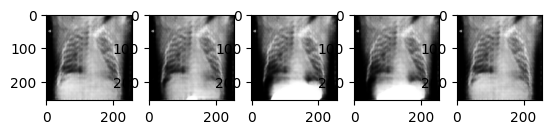

In [ ]:
train(epochs=100)

In [ ]:
def gen_img():
  noise = np.random.normal(0, 1, (10, 500))
  p = generator(noise)
  j = 0
  plt.figure()
  _, a = plt.subplots(1, 10)
  for i in p:
    a[j].imshow(i*127.5 + 127.5, cmap='gray')
    j += 1
  plt.show()

gen_img()